*   numpy : operasi matematika, terutama array dan matriks.
*   pandas : olah data tabular / dataframe
*   os : Berinteraksi dengan sistem file (buat folder, baca file, dll).
*   matplotlib : Visualisasi data (grafik, plot, gambar).
*   seaborn : Visualisasi data yang lebih bagus dari matplotlib
*   tensorflow : Library machine learning untuk deep learning   
*   keras : API di TensorFlow untuk membangun model neural network.   
*   tqdm : Progress bar saat menjalankan loop   
*   confusion_matrix, accuracy_score : Evaluasi model (akurasi & confusion matrix).
*   classification_report : Laporan metrik klasifikasi (precision, recall, F1-score).
*   train_test_split : Membagi dataset jadi train dan test.
*   LabelEncoder : Encode label kategorikal menjadi angka.
*   glob : Mencari file dengan pola tertentu
*   warnings : Mengatur peringatan saat menjalankan kode



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#modul untuk bisa akses google drive
from google.colab import drive

#Memasangkan Google Drive ke direktori /content/drive di Colab.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#menampilkan daftar file dan folder dalam direktori.
!ls /content/drive/MyDrive/DATASET

 10_Buavita-orange-juice		    '35_Ultra Milk Strawberry'
 11_Cimory-Fresh-Milk-Almond		    '36_Frisian Flag Full Cream'
 12_Cimory-Yogurt-Drink-Strawberry	    '37_Ichitan Thai Milk Green Tea'
 13_Ichitan-Thai-Milk-Green-Tea		    '38_Yupi Choco Glee'
 14_Frisian-Flag-Ketan-Hitam		    '39_Dilan Bon Bon Milk Chocolate'
 15_Golda-Coffee-Dolce-Latte		     3_you-c1000-orange
 16_Good-Day-Originale-Cappucino	    '40_Nabati Wafer Richeese'
 17_YOU-C1000-Lemon			    '41_SIMBA CHOCO Chips CUP Chocolate Flavor'
 18_Good-Day-Funtastic-Mocacinno	    '42_SIMBA CHOCO Chips CUP Strawberry Flavor'
 19_Coca-Cola-Zero-Sugar		    '43_Pocky Chocolate Flavour'
 1_teh-botol-less-sugar			    '44_Lemonilo Brownies Crispy Strawberry Cheese'
 20_Greenfields-Caffe-Latte		    '45_Nyam nyam fantasy stick'
 21_Teh-Kotak-Melati-Less-Sugar		    '46_Malkist Cokelat Kelapa'
 22_Coca-Cola				    '47_Choco Strawberry Flavor'
 23_Fanta				    '48_Marry Queen Chocolate Cashew Nut'
 24_Sprite				    '49_Choco Chocolate Flavo

In [ ]:
datagambar = '/content/drive/MyDrive/DATASET'

# membuat DataFrame dengan daftar nama file
# dataframe = struktur data 2 dimensi
# os.listdir untuk mengambil daftar semua file dan folder dalam direktori
file_list = pd.DataFrame(os.listdir(datagambar), columns=['product'])
print(file_list)

                                           product
0                           1_teh-botol-less-sugar
1                         2_golda-coffee-cappucino
2                               3_you-c1000-orange
3                              4_oatside-chocolate
4                                  6_abc-kopi-susu
5                          5_abc-choco-malt-coffee
6                            7_ABC-Sari-Kacang-Ijo
7                                     8_Bear-brand
8                            9_Buavita-mango-juice
9                          10_Buavita-orange-juice
10                     11_Cimory-Fresh-Milk-Almond
11                  13_Ichitan-Thai-Milk-Green-Tea
12               12_Cimory-Yogurt-Drink-Strawberry
13                     14_Frisian-Flag-Ketan-Hitam
14                     15_Golda-Coffee-Dolce-Latte
15                 16_Good-Day-Originale-Cappucino
16                              17_YOU-C1000-Lemon
17                 18_Good-Day-Funtastic-Mocacinno
18                         19_C

In [ ]:
#Menyiapkan data gambar dan label sebelum digunakan untuk pelatihan model.

# mengambil semua path file
files = [i for i in glob.glob(datagambar + "//*//*")]

# mengacak urutan file-file
np.random.shuffle(files)

# mengambil label kelas dari setiap file berdasarkan nama folder file tsb
#labels = [os.path.basename(os.path.dirname(i)).split("_")[0] for i in files]
labels = [os.path.dirname(i).split("/")[-1] for i in files]
labels

# menggabungkan setiap file dengan labelnya
data = zip(files, labels)
data = list(zip(files, labels))

# Membuat DataFrame dari pasangan file-label
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])

dataframe

,Image,Label
0,/content/drive/MyDrive/DATASET/42_SIMBA CHOCO ...,42_SIMBA CHOCO Chips CUP Strawberry Flavor
1,/content/drive/MyDrive/DATASET/29_CLEVO-UHT-MI...,29_CLEVO-UHT-MILK-COKLAT
2,/content/drive/MyDrive/DATASET/40_Nabati Wafer...,40_Nabati Wafer Richeese
3,/content/drive/MyDrive/DATASET/40_Nabati Wafer...,40_Nabati Wafer Richeese
4,/content/drive/MyDrive/DATASET/22_Coca-Cola/Wh...,22_Coca-Cola
...,...,...
624,/content/drive/MyDrive/DATASET/35_Ultra Milk S...,35_Ultra Milk Strawberry
625,/content/drive/MyDrive/DATASET/26_Teh-pucuk/Wh...,26_Teh-pucuk
626,/content/drive/MyDrive/DATASET/2_golda-coffee-...,2_golda-coffee-cappucino
627,/content/drive/MyDrive/DATASET/39_Dilan Bon Bo...,39_Dilan Bon Bon Milk Chocolate


In [ ]:
# Menghitung jumlah kemunculan setiap label
#label_counts = dataframe["Label"].value_counts()
label_counts = dataframe["Label"].value_counts().sort_index()
label_counts

,count
Label,
10_Buavita-orange-juice,5
11_Cimory-Fresh-Milk-Almond,5
12_Cimory-Yogurt-Drink-Strawberry,5
13_Ichitan-Thai-Milk-Green-Tea,5
14_Frisian-Flag-Ketan-Hitam,5
15_Golda-Coffee-Dolce-Latte,9
16_Good-Day-Originale-Cappucino,5
17_YOU-C1000-Lemon,4
18_Good-Day-Funtastic-Mocacinno,5


In [ ]:
# Menghitung total jumlah gambar dalam dataset
total_images = dataframe.shape[0]
print("\nTotal jumlah data:", total_images)


Total jumlah data: 629


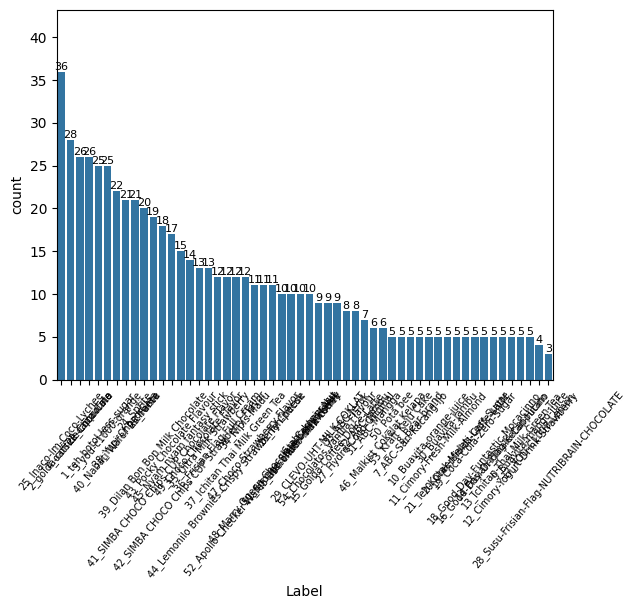

In [ ]:
# sorting tinggi ke rendah
label_counts_sorted = label_counts.sort_values(ascending=False)

# membuat grafik batang yang menghitung jumlah data dalam setiap label
sns.countplot(x=dataframe["Label"], order=label_counts_sorted.index)

# menambah angka rincian di atas setiap batang
for i, count in enumerate(label_counts_sorted):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=8)

# mengatur rotasi label sumbu x
# Mengatur jarak antar label sumbu X lebih besar
plt.xticks(rotation=50, fontsize=7)

# Mengatur batas atas sumbu Y agar lebih proporsional
plt.ylim(0, max(label_counts_sorted) * 1.2)

# Menampilkan plot
plt.show()

In [ ]:
train_data_dir = datagambar
batch_size = 128
target_size = (180,180)
validation_split = 0.2


In [ ]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

Found 602 files belonging to 54 classes.
Using 482 files for training.
Found 602 files belonging to 54 classes.
Using 120 files for validation.


In [95]:
class_names = train.class_names
#class_names = [int(name.split("_")[0]) for name in train.class_names]
class_names

['10_Buavita-orange-juice',
 '11_Cimory-Fresh-Milk-Almond',
 '12_Cimory-Yogurt-Drink-Strawberry',
 '13_Ichitan-Thai-Milk-Green-Tea',
 '14_Frisian-Flag-Ketan-Hitam',
 '15_Golda-Coffee-Dolce-Latte',
 '16_Good-Day-Originale-Cappucino',
 '17_YOU-C1000-Lemon',
 '18_Good-Day-Funtastic-Mocacinno',
 '19_Coca-Cola-Zero-Sugar',
 '1_teh-botol-less-sugar',
 '20_Greenfields-Caffe-Latte',
 '21_Teh-Kotak-Melati-Less-Sugar',
 '22_Coca-Cola',
 '23_Fanta',
 '24_Sprite',
 '25_Inaco-Im-Coco-Lychee',
 '26_Teh-pucuk',
 '27_Hydro-Coco-Original',
 '28_Susu-Frisian-Flag-NUTRIBRAIN-CHOCOLATE',
 '29_CLEVO-UHT-MILK-COKLAT',
 '2_golda-coffee-cappucino',
 '30_Buavita-Jambu',
 '31_ABC-Mangga',
 '32_ABC-Jambu',
 '33_ABC-Jeruk',
 '34_Nipis-Madu',
 '35_Ultra Milk Strawberry',
 '36_Frisian Flag Full Cream',
 '37_Ichitan Thai Milk Green Tea',
 '38_Yupi Choco Glee',
 '39_Dilan Bon Bon Milk Chocolate',
 '3_you-c1000-orange',
 '40_Nabati Wafer Richeese',
 '41_SIMBA CHOCO Chips CUP Chocolate Flavor',
 '42_SIMBA CHOCO Chips C

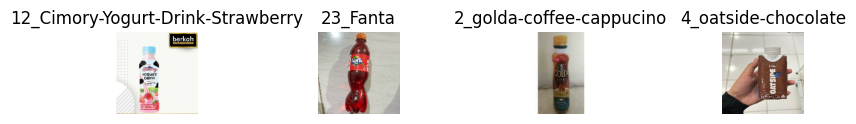

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(4):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

#Optimizer Adam untuk meminimalisir terjadinya overfitting selama proses pembelajaran.
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
#history = model.fit(train, validation_data=validation, epochs=10)

from tensorflow.keras.callbacks import EarlyStopping

# Callbacks: Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # Pantau validation loss
    patience=5,               # Hentikan training jika val_loss tidak membaik setelah 5 epoch
    restore_best_weights=True # Kembalikan bobot terbaik sebelum overfitting
)

# Melatih model dengan callbacks
history = model.fit(
    train,
    validation_data=validation,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 116s 28s/step - accuracy: 0.0194 - loss: 3.9577 - val_accuracy: 0.0250 - val_loss: 3.7500
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 14s/step - accuracy: 0.0799 - loss: 3.7749 - val_accuracy: 0.1417 - val_loss: 3.5433
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 92s 17s/step - accuracy: 0.0967 - loss: 3.5887 - val_accuracy: 0.2750 - val_loss: 3.1980
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 60s 14s/step - accuracy: 0.1967 - loss: 3.2639 - val_accuracy: 0.4500 - val_loss: 2.6420
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 13s/step - accuracy: 0.2828 - loss: 2.8693 - val_accuracy: 0.5667 - val_loss: 2.0412
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 84s 15s/step - accuracy: 0.3973 - loss: 2.3784 - val_accuracy: 0.6167 - val_loss: 1.7707
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 14s/step - accuracy: 0.4958 - loss: 1.9791 - val_accuracy: 0.6750 - val_loss: 1.3235
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 93s 18s/step - accuracy: 0.5368 - loss: 1.7573 - val_accuracy: 0.7417 - val_loss: 1.0987

In [147]:
# Evaluasi model dengan data uji/validasi
test_loss, test_acc = model.evaluate(validation)

print(f"Validation Loss: {test_loss:.4f}")
print(f"Validation Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9417 - loss: 0.3095
Validation Loss: 0.3095
Validation Accuracy: 0.9417


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


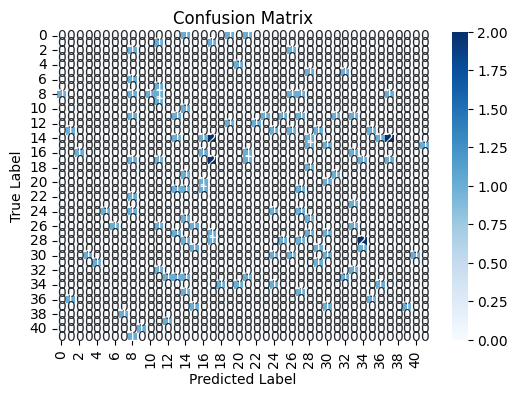

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.12      0.14      0.13         7
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00         3
          20       0.25      0.25      0.25         4
          21       0.29    

In [148]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi model pada data validasi
y_pred_probs = model.predict(validation)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Ambil label dengan probabilitas tertinggi
y_true = np.concatenate([y for x, y in validation], axis=0)  # Ambil label sebenarnya

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Precision, Recall, dan F1-Score
print(classification_report(y_true, y_pred_classes))


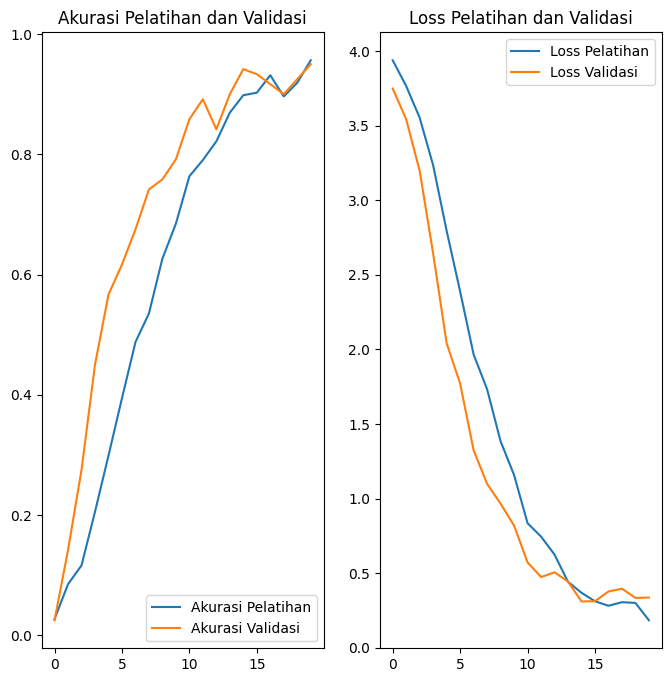

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Pelatihan')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Pelatihan')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')
plt.show()

In [ ]:
model.save('product_model.keras')

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import scipy

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("SciPy:", scipy.__version__)

TensorFlow: 2.18.0
NumPy: 1.26.4
Pandas: 2.2.2
scikit-learn: 1.6.1
SciPy: 1.14.1


In [40]:
# Memuat model dari file .keras
model = tf.keras.models.load_model('product_model.keras')

In [ ]:
# Membuat converter dari model yang sudah diload
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Melakukan konversi ke format TFLite
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpeucvcbfl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 54), dtype=tf.float32, name=None)
Captures:
  140057973847824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973848400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973849936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973848976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973849168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973847248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057973848208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057944933776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057944932816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057944934736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140057944933

In [ ]:
# Menyimpan model yang sudah dikonversi ke file .tflite
with open('product_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [41]:
import os
print("File TFLite berhasil dibuat:", os.path.exists('product_model.tflite'))


File TFLite berhasil dibuat: True


In [36]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="product_model.tflite")
interpreter.allocate_tensors()

# Dapatkan indeks input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Periksa bentuk input yang diharapkan
print("Input Shape:", input_details[0]['shape'])
print("Tipe Data Input Model:", input_details[0]['dtype'])



Input Shape: [  1 180 180   3]
Tipe Data Input Model: <class 'numpy.float32'>


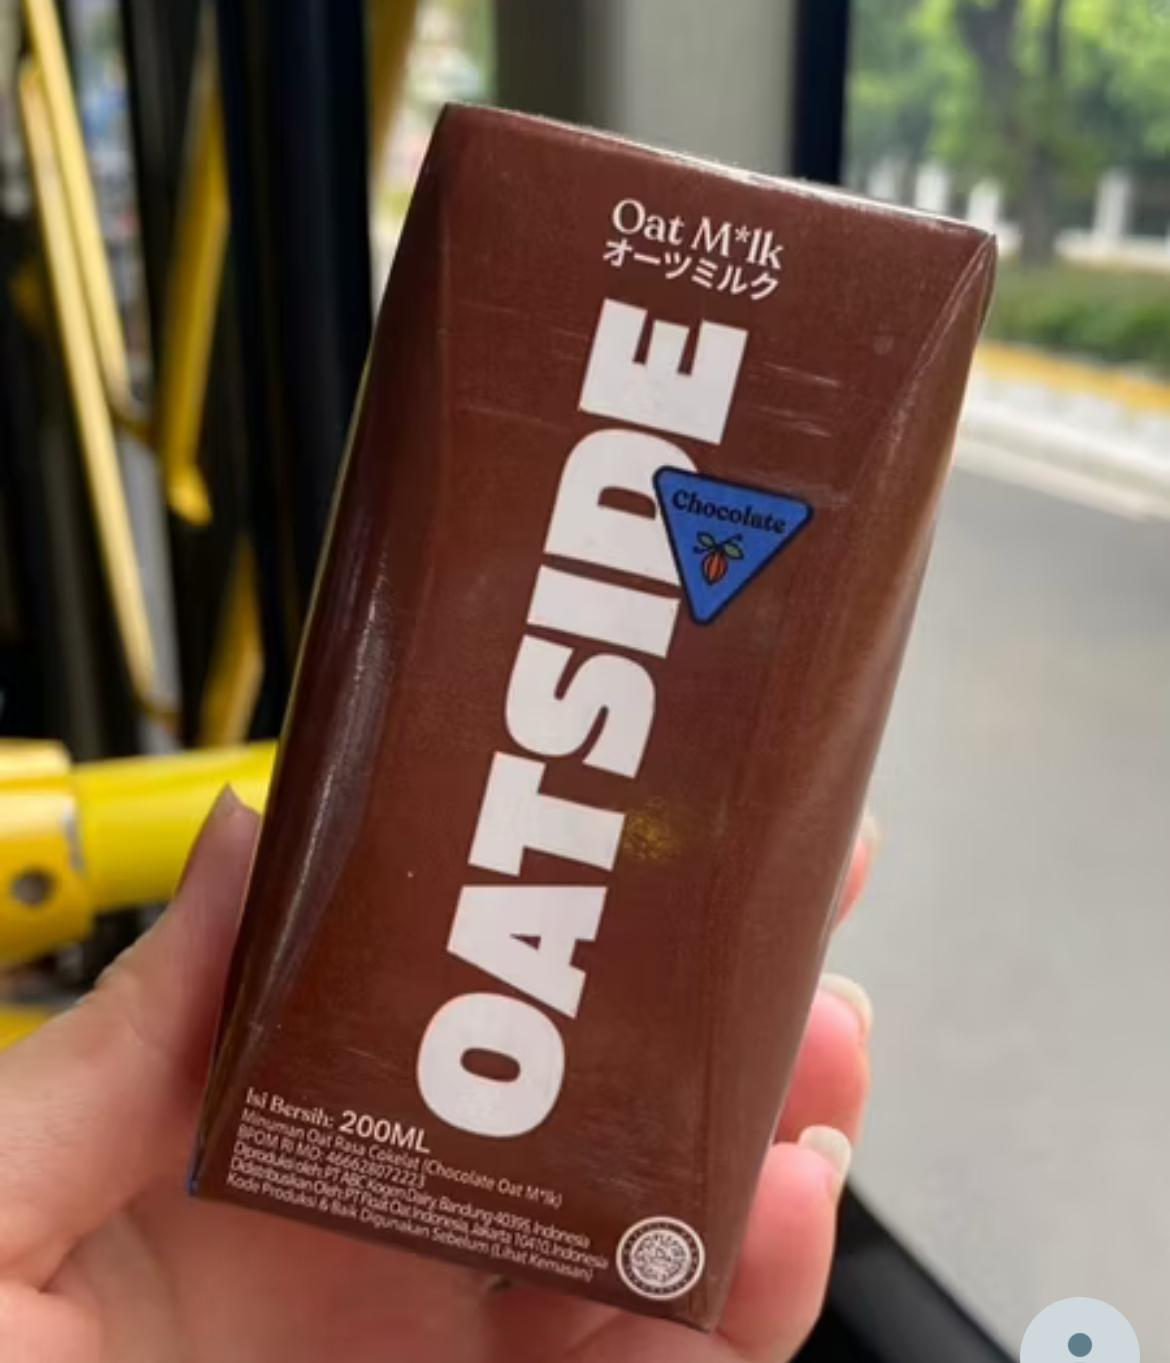

In [37]:
#pre processing gambar inputan untuk test model
from PIL import Image
image_path = "/content/oatside.jpeg"


# Coba buka gambar
image = Image.open(image_path)
image


In [64]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="product_model.tflite")
interpreter.allocate_tensors()

# Dapatkan indeks input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])  # Periksa bentuk input yang diharapkan


Input Shape: [  1 180 180   3]


In [119]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="product_model.tflite")
interpreter.allocate_tensors()

# Ambil informasi tentang input dan output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Daftar nama kelas (Gantilah dengan class_names modelmu)
class_names = ['10_Buavita-orange-juice',
 '11_Cimory-Fresh-Milk-Almond',
 '12_Cimory-Yogurt-Drink-Strawberry',
 '13_Ichitan-Thai-Milk-Green-Tea',
 '14_Frisian-Flag-Ketan-Hitam',
 '15_Golda-Coffee-Dolce-Latte',
 '16_Good-Day-Originale-Cappucino',
 '17_YOU-C1000-Lemon',
 '18_Good-Day-Funtastic-Mocacinno',
 '19_Coca-Cola-Zero-Sugar',
 '1_teh-botol-less-sugar',
 '20_Greenfields-Caffe-Latte',
 '21_Teh-Kotak-Melati-Less-Sugar',
 '22_Coca-Cola',
 '23_Fanta',
 '24_Sprite',
 '25_Inaco-Im-Coco-Lychee',
 '26_Teh-pucuk',
 '27_Hydro-Coco-Original',
 '28_Susu-Frisian-Flag-NUTRIBRAIN-CHOCOLATE',
 '29_CLEVO-UHT-MILK-COKLAT',
 '2_golda-coffee-cappucino',
 '30_Buavita-Jambu',
 '31_ABC-Mangga',
 '32_ABC-Jambu',
 '33_ABC-Jeruk',
 '34_Nipis-Madu',
 '35_Ultra Milk Strawberry',
 '36_Frisian Flag Full Cream',
 '37_Ichitan Thai Milk Green Tea',
 '38_Yupi Choco Glee',
 '39_Dilan Bon Bon Milk Chocolate',
 '3_you-c1000-orange',
 '40_Nabati Wafer Richeese',
 '41_SIMBA CHOCO Chips CUP Chocolate Flavor',
 '42_SIMBA CHOCO Chips CUP Strawberry Flavor',
 '43_Pocky Chocolate Flavour',
 '44_Lemonilo Brownies Crispy Strawberry Cheese',
 '45_Nyam nyam fantasy stick',
 '46_Malkist Cokelat Kelapa',
 '47_Choco Strawberry Flavor',
 '48_Marry Queen Chocolate Cashew Nut',
 '49_Choco Chocolate Flavor',
 '4_oatside-chocolate',
 '50_Pota bee',
 '51_Sponge Strawberry Flavor',
 '52_Apollo Checker Wafer Chocolate - Strawberry',
 '53_Kraft Keju Cake',
 '54_Chocolatos Vanilla Flavour',
 '5_abc-choco-malt-coffee',
 '6_abc-kopi-susu',
 '7_ABC-Sari-Kacang-Ijo',
 '8_Bear-brand',
 '9_Buavita-mango-juice']

# Fungsi untuk memproses gambar
def preprocess_image(image_path):
    # Load gambar dan ubah ke RGB
    img = Image.open(image_path).convert("RGB")

    # Resize gambar sesuai input model (pastikan sesuai dengan model)
    target_size = (input_details[0]['shape'][1], input_details[0]['shape'][2])
    img = img.resize(target_size)

    # Konversi ke numpy array
    img_array = np.array(img, dtype=np.float32)

    # Normalisasi (karena model dilatih dengan Rescaling 1./255)
    img_array /= 255.0

    # Tambahkan batch dimension: (height, width, 3) -> (1, height, width, 3)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Fungsi untuk melakukan inferensi
def predict_image(image_path):
    # Preprocessing gambar
    input_data = preprocess_image(image_path)

    # Masukkan input ke model TFLite
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Jalankan inferensi
    interpreter.invoke()

    # Ambil hasil output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Ambil kelas dengan probabilitas tertinggi
    predicted_label = np.argmax(output_data)
    confidence = np.max(output_data)

    # Mapping ke nama kelas
    predicted_class = class_names[predicted_label]

    # Tampilkan hasil
    print(f"Prediksi Kelas: {predicted_label}")
    print(f"Nama Kelas: {predicted_class}")
    print(f"Kepercayaan: {confidence:.2f}")

    return predicted_class, confidence


image_path = "oatside.jpeg"
predicted_class, confidence = predict_image(image_path)

image_path = "3.jpg"
predicted_class, confidence = predict_image(image_path)




Prediksi Kelas: 29
Nama Kelas: 37_Ichitan Thai Milk Green Tea
Kepercayaan: 0.20
Prediksi Kelas: 29
Nama Kelas: 37_Ichitan Thai Milk Green Tea
Kepercayaan: 0.19


In [145]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="product_model.tflite")
interpreter.allocate_tensors()

# Ambil informasi tentang input dan output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Daftar nama kelas (Gantilah dengan class_names modelmu)
class_names = [
    '10_Buavita-orange-juice', '11_Cimory-Fresh-Milk-Almond', '12_Cimory-Yogurt-Drink-Strawberry',
    '13_Ichitan-Thai-Milk-Green-Tea', '14_Frisian-Flag-Ketan-Hitam', '15_Golda-Coffee-Dolce-Latte',
    '16_Good-Day-Originale-Cappucino', '17_YOU-C1000-Lemon', '18_Good-Day-Funtastic-Mocacinno',
    '19_Coca-Cola-Zero-Sugar', '1_teh-botol-less-sugar', '20_Greenfields-Caffe-Latte',
    '21_Teh-Kotak-Melati-Less-Sugar', '22_Coca-Cola', '23_Fanta', '24_Sprite',
    '25_Inaco-Im-Coco-Lychee', '26_Teh-pucuk', '27_Hydro-Coco-Original',
    '28_Susu-Frisian-Flag-NUTRIBRAIN-CHOCOLATE', '29_CLEVO-UHT-MILK-COKLAT', '2_golda-coffee-cappucino',
    '30_Buavita-Jambu', '31_ABC-Mangga', '32_ABC-Jambu', '33_ABC-Jeruk', '34_Nipis-Madu',
    '35_Ultra Milk Strawberry', '36_Frisian Flag Full Cream', '37_Ichitan Thai Milk Green Tea',
    '38_Yupi Choco Glee', '39_Dilan Bon Bon Milk Chocolate', '3_you-c1000-orange',
    '40_Nabati Wafer Richeese', '41_SIMBA CHOCO Chips CUP Chocolate Flavor',
    '42_SIMBA CHOCO Chips CUP Strawberry Flavor', '43_Pocky Chocolate Flavour',
    '44_Lemonilo Brownies Crispy Strawberry Cheese', '45_Nyam nyam fantasy stick',
    '46_Malkist Cokelat Kelapa', '47_Choco Strawberry Flavor', '48_Marry Queen Chocolate Cashew Nut',
    '49_Choco Chocolate Flavor', '4_oatside-chocolate', '50_Pota bee', '51_Sponge Strawberry Flavor',
    '52_Apollo Checker Wafer Chocolate - Strawberry', '53_Kraft Keju Cake', '54_Chocolatos Vanilla Flavour',
    '5_abc-choco-malt-coffee', '6_abc-kopi-susu', '7_ABC-Sari-Kacang-Ijo', '8_Bear-brand',
    '9_Buavita-mango-juice'
]

# Fungsi untuk memproses gambar
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")

    # Resize gambar sesuai input model
    target_size = (input_details[0]['shape'][1], input_details[0]['shape'][2])
    img = img.resize(target_size)

    # Konversi ke numpy array
    img_array = np.array(img, dtype=np.float32)

    # Normalisasi
    img_array /= 255.0

    # Tambahkan batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Fungsi untuk melakukan inferensi dan mendapatkan top 5 prediksi
def predict_top_5(image_path):
    input_data = preprocess_image(image_path)

    # Masukkan input ke model TFLite
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Jalankan inferensi
    interpreter.invoke()

    # Ambil hasil output
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]  # Ambil array 1D

    # Jika model tidak menggunakan softmax, tambahkan secara manual
    if output_details[0]['dtype'] == np.float32:
      output_data = np.exp(output_data) / np.sum(np.exp(output_data))  # Softmax manual

    # Ambil 5 kelas dengan confidence tertinggi
    top_5_indices = np.argsort(output_data)[-5:][::-1]  # Urutkan dan ambil 5 terbesar

    # Cetak hasil prediksi
    print("\nTop 5 Predictions:")
    for i in top_5_indices:
        print(f"{class_names[i]} - Confidence: {output_data[i]:.4f}")

    return [(class_names[i], output_data[i]) for i in top_5_indices]  # Kembalikan dalam bentuk list

# Contoh penggunaan
image_path = "oatside.jpeg"
print(f"\nPrediksi Gambar: {image_path}")
top_5_predictions = predict_top_5(image_path)

image_path = "tehbotol.jpg"
print(f"\nPrediksi Gambar: {image_path}")
top_5_predictions = predict_top_5(image_path)

image_path = "youcorange.jpeg"
print(f"\nPrediksi Gambar: {image_path}")
top_5_predictions = predict_top_5(image_path)

image_path = "potabee.jpg"
print(f"\nPrediksi Gambar: {image_path}")
top_5_predictions = predict_top_5(image_path)



Prediksi Gambar: oatside.jpeg

Top 5 Predictions:
37_Ichitan Thai Milk Green Tea - Confidence: 0.0221
2_golda-coffee-cappucino - Confidence: 0.0196
40_Nabati Wafer Richeese - Confidence: 0.0191
39_Dilan Bon Bon Milk Chocolate - Confidence: 0.0191
53_Kraft Keju Cake - Confidence: 0.0190

Prediksi Gambar: tehbotol.jpg

Top 5 Predictions:
37_Ichitan Thai Milk Green Tea - Confidence: 0.0221
2_golda-coffee-cappucino - Confidence: 0.0195
39_Dilan Bon Bon Milk Chocolate - Confidence: 0.0191
40_Nabati Wafer Richeese - Confidence: 0.0191
53_Kraft Keju Cake - Confidence: 0.0190

Prediksi Gambar: youcorange.jpeg

Top 5 Predictions:
37_Ichitan Thai Milk Green Tea - Confidence: 0.0221
2_golda-coffee-cappucino - Confidence: 0.0195
39_Dilan Bon Bon Milk Chocolate - Confidence: 0.0191
40_Nabati Wafer Richeese - Confidence: 0.0191
53_Kraft Keju Cake - Confidence: 0.0190

Prediksi Gambar: potabee.jpg

Top 5 Predictions:
37_Ichitan Thai Milk Green Tea - Confidence: 0.0222
2_golda-coffee-cappucino - Conf

In [143]:
print(input_details[0]['dtype'])  # Cek apakah float32 atau uint8
print(output_data.shape)

<class 'numpy.float32'>
(1, 54)
